In [7]:

import kagglehub

# Re-download the dataset
dataset_path = kagglehub.dataset_download('vasukipatel/face-recognition-dataset')

print(f"Dataset downloaded to: {dataset_path}")


Dataset downloaded to: /kaggle/input/face-recognition-dataset


In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/face-recognition-dataset/Faces/Faces/Virat Kohli_1.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Camila Cabello_30.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Lisa Kudrow_6.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Vijay Deverakonda_54.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Ellen Degeneres_12.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Brad Pitt_92.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Jessica Alba_83.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Brad Pitt_68.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Elizabeth Olsen_58.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Kashyap_25.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Hrithik Roshan_27.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Hrithik Roshan_16.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Camila Cabello_71.jpg
/kaggle/input/face-rec

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!pip install insightface onnxruntime-gpu

In [11]:
import onnxruntime as ort
print(ort.get_device())  # Should print 'GPU'

GPU


In [12]:
import cv2
import numpy as np
import os
import pickle
import insightface
from insightface.app import FaceAnalysis

# Define the dataset directory
dataset_dir = '/kaggle/input/face-recognition-dataset/Original Images/Original Images'  # Replace with the actual path to the dataset

# Create 'data' directory if it doesn't exist
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data'):
    os.makedirs('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data')

# Initialize ArcFace model (InsightFace)
def load_arcface_model():
    app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])  # Using GPU if available
    app.prepare(ctx_id=0, det_size=(640, 640))  # Prepare the face detection and embedding model
    return app

arcface_model = load_arcface_model()

# Load existing data if available
if os.path.exists('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/face_data.pkl') and os.path.exists('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/labels.pkl'):
    with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/face_data.pkl', 'rb') as f:
        face_data = pickle.load(f)
    with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/labels.pkl', 'rb') as f:
        labels = pickle.load(f)

    # Convert to list if necessary
    if isinstance(face_data, np.ndarray):
        face_data = face_data.tolist()
    if isinstance(labels, np.ndarray):
        labels = labels.tolist()
else:
    face_data = []
    labels = []

# Iterate through each folder in the dataset
for folder_name in os.listdir(dataset_dir):
    person_dir = os.path.join(dataset_dir, folder_name)
    if os.path.isdir(person_dir):
        print(f"Processing faces for {folder_name}")

        # Iterate through each image in the folder
        for image_name in os.listdir(person_dir):
            image_path = os.path.join(person_dir, image_name)

            # Read the image
            img = cv2.imread(image_path)
            if img is None:
                continue

            # Detect faces and get embeddings using ArcFace
            faces = arcface_model.get(img)

            if faces:
                for face in faces:
                    # Get the embedding (normalized ArcFace embeddings)
                    embedding = face.normed_embedding

                    # Append embedding and label
                    face_data.append(embedding)
                    labels.append(folder_name)

            else:
                print(f"No faces detected for {folder_name} in image {image_name}")

# Save the face embeddings and labels
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/face_data.pkl', 'wb') as f:
    pickle.dump(np.array(face_data), f)
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/labels.pkl', 'wb') as f:
    pickle.dump(np.array(labels), f)

print("Data processing complete.")


Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'fuse_conv_bias': '0', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with o

In [13]:
import cv2
import numpy as np
import os
import pickle
import insightface
from insightface.app import FaceAnalysis

# Define the dataset directory
dataset_dir = '/content/drive/MyDrive/Colab Notebooks/Face Recognition/Photos'
# Create 'data' directory if it doesn't exist
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data'):
    os.makedirs('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data')

# Initialize ArcFace model (InsightFace)
def load_arcface_model():
    app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])  # Using GPU if available
    app.prepare(ctx_id=0, det_size=(640, 640))  # Prepare the face detection and embedding model
    return app

arcface_model = load_arcface_model()

# Load existing data if available
if os.path.exists('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/face_data.pkl') and os.path.exists('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/labels.pkl'):
    with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/face_data.pkl', 'rb') as f:
        face_data = pickle.load(f)
    with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/labels.pkl', 'rb') as f:
        labels = pickle.load(f)

    # Convert to list if necessary
    if isinstance(face_data, np.ndarray):
        face_data = face_data.tolist()
    if isinstance(labels, np.ndarray):
        labels = labels.tolist()
else:
    face_data = []
    labels = []

# Iterate through each folder in the dataset
for folder_name in os.listdir(dataset_dir):
    person_dir = os.path.join(dataset_dir, folder_name)
    if os.path.isdir(person_dir):
        print(f"Processing faces for {folder_name}")

        # Iterate through each image in the folder
        for image_name in os.listdir(person_dir):
            image_path = os.path.join(person_dir, image_name)

            # Read the image
            img = cv2.imread(image_path)
            if img is None:
                continue

            # Detect faces and get embeddings using ArcFace
            faces = arcface_model.get(img)

            if faces:
                for face in faces:
                    # Get the embedding (normalized ArcFace embeddings)
                    embedding = face.normed_embedding

                    # Append embedding and label
                    face_data.append(embedding)
                    labels.append(folder_name)
            else:
                print(f"No faces detected for {folder_name} in image {image_name}")

# Save the face embeddings and labels
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/face_data.pkl', 'wb') as f:
    pickle.dump(np.array(face_data), f)
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/labels.pkl', 'wb') as f:
    pickle.dump(np.array(labels), f)

print("Data processing complete.")


Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'fuse_conv_bias': '0', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with o

In [1]:
!pip install facenet-pytorch

In [2]:
import cv2
import numpy as np
import os
import pickle
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Define the dataset directory
dataset_dir = '/kaggle/input/face-recognition-dataset/Original Images/Original Images'  # Replace with the actual path to the dataset

# Create 'data' directory if it doesn't exist
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data0'):
    os.makedirs('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data0')

# Initialize FaceNet model
mtcnn = MTCNN(keep_all=True, device=device)
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Load existing data if available
if os.path.exists('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data0/face_data.pkl') and os.path.exists('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data0/labels.pkl'):
    with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data0/face_data.pkl', 'rb') as f:
        face_data = pickle.load(f)
    with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data0/labels.pkl', 'rb') as f:
        labels = pickle.load(f)

    # Convert to list if necessary
    if isinstance(face_data, np.ndarray):
        face_data = face_data.tolist()
    if isinstance(labels, np.ndarray):
        labels = labels.tolist()
else:
    face_data = []
    labels = []

# Minimum face size to avoid errors (set to 160x160, the expected input size for FaceNet)
FIXED_FACE_SIZE = (160, 160)

# Iterate through each folder in the dataset
for folder_name in os.listdir(dataset_dir):
    person_dir = os.path.join(dataset_dir, folder_name)
    if os.path.isdir(person_dir):
        print(f"Processing faces for {folder_name}")

        # Iterate through each image in the folder
        for image_name in os.listdir(person_dir):
            image_path = os.path.join(person_dir, image_name)

            # Read the image
            img = cv2.imread(image_path)
            if img is None:
                print(f"Error reading image {image_name}, skipping.")
                continue

            # Detect faces using MTCNN (face detector from FaceNet)
            boxes, _ = mtcnn.detect(img)

            if boxes is not None:
                for box in boxes:
                    # Extract face coordinates
                    x1, y1, x2, y2 = [int(b) for b in box]
                    face = img[y1:y2, x1:x2]

                    # Ensure the face crop is valid (non-empty)
                    if face.size == 0:
                        print(f"Skipping empty face for {folder_name} in image {image_name}")
                        continue

                    # Resize the face to the fixed size (160x160)
                    face_resized = cv2.resize(face, FIXED_FACE_SIZE)

                    # Convert face to RGB and get embedding
                    face_resized_rgb = cv2.cvtColor(face_resized, cv2.COLOR_BGR2RGB)  # Convert to RGB
                    face_tensor = torch.tensor(face_resized_rgb).permute(2, 0, 1).unsqueeze(0).float().to(device) / 255.0
                    embedding = resnet(face_tensor).detach().cpu().numpy()[0]

                    # Append embedding and label
                    face_data.append(embedding)
                    labels.append(folder_name)

            else:
                print(f"No faces detected for {folder_name} in image {image_name}")

# Save the face embeddings and labels
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data0/face_data.pkl', 'wb') as f:
    pickle.dump(np.array(face_data), f)
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data0/labels.pkl', 'wb') as f:
    pickle.dump(np.array(labels), f)

print("Data processing complete.")


Using device: cuda


  0%|          | 0.00/107M [00:00<?, ?B/s]

Processing faces for Alia Bhatt
No faces detected for Alia Bhatt in image Alia Bhatt_52.jpg
No faces detected for Alia Bhatt in image Alia Bhatt_40.jpg
Processing faces for Charlize Theron
Skipping empty face for Charlize Theron in image Charlize Theron_26.jpg
Skipping empty face for Charlize Theron in image Charlize Theron_54.jpg
No faces detected for Charlize Theron in image Charlize Theron_44.jpg
Processing faces for Zac Efron
Skipping empty face for Zac Efron in image Zac Efron_65.jpg
Skipping empty face for Zac Efron in image Zac Efron_8.jpg
Skipping empty face for Zac Efron in image Zac Efron_53.jpg
Skipping empty face for Zac Efron in image Zac Efron_86.jpg
Processing faces for Billie Eilish
Skipping empty face for Billie Eilish in image Billie Eilish_86.jpg
No faces detected for Billie Eilish in image Billie Eilish_84.jpg
No faces detected for Billie Eilish in image Billie Eilish_12.jpg
No faces detected for Billie Eilish in image Billie Eilish_97.jpg
No faces detected for Bill

In [3]:
import numpy as np
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

In [4]:
import os
# Load the embeddings and labels
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/face_data.pkl', 'rb') as f:
    face_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/labels.pkl', 'rb') as f:
    labels = pickle.load(f)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(face_data, labels, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(probability=True),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'LDA':LinearDiscriminantAnalysis()
}

# Function to train and save models
def train_model(model_name, model):
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    # Create 'models' directory if it doesn't exist
    model_dir = '/content/drive/MyDrive/Colab Notebooks/Face Recognition/models'
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    # Save the trained model
    with open(f'/content/drive/MyDrive/Colab Notebooks/Face Recognition/models/{model_name.lower().replace(" ", "_")}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

    y_pred = model.predict(X_test)

    # Print test accuracy
    test_accuracy = model.score(X_test, y_test)
    print(f"{model_name} Test Accuracy: {test_accuracy:.2f}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")

# Train and save all models
for model_name, model in models.items():
    train_model(model_name, model)

Training KNN...
KNN Test Accuracy: 0.99
KNN Classification Report:
                    precision    recall  f1-score   support

      Akshay Kumar       1.00      0.96      0.98        25
Alexandra Daddario       0.91      1.00      0.95        31
        Alia Bhatt       1.00      1.00      1.00        35
  Amitabh Bachchan       1.00      1.00      1.00        29
      Andy Samberg       0.93      1.00      0.96        38
    Anushka Sharma       1.00      1.00      1.00        32
     Billie Eilish       1.00      1.00      1.00        37
         Brad Pitt       1.00      0.97      0.98        31
    Camila Cabello       1.00      0.98      0.99        43
   Charlize Theron       1.00      1.00      1.00        29
       Claire Holt       1.00      0.97      0.99        39
      Courtney Cox       1.00      1.00      1.00        40
    Dwayne Johnson       1.00      0.93      0.96        29
   Elizabeth Olsen       1.00      0.97      0.98        30
   Ellen Degeneres       1.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LDA Test Accuracy: 1.00
LDA Classification Report:
                    precision    recall  f1-score   support

      Akshay Kumar       1.00      1.00      1.00        25
Alexandra Daddario       1.00      1.00      1.00        31
        Alia Bhatt       1.00      1.00      1.00        35
  Amitabh Bachchan       1.00      1.00      1.00        29
      Andy Samberg       1.00      1.00      1.00        38
    Anushka Sharma       1.00      1.00      1.00        32
     Billie Eilish       1.00      1.00      1.00        37
         Brad Pitt       1.00      1.00      1.00        31
    Camila Cabello       1.00      1.00      1.00        43
   Charlize Theron       1.00      1.00      1.00        29
       Claire Holt       1.00      1.00      1.00        39
      Courtney Cox       1.00      1.00      1.00        40
    Dwayne Johnson       1.00      0.93      0.96        29
   Elizabeth Olsen       1.00      1.00      1.00        30
   Ellen Degeneres       1.00      1.00      1.0

In [5]:
# Load the embeddings and labels
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data0/face_data.pkl', 'rb') as f:
    face_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data0/labels.pkl', 'rb') as f:
    labels = pickle.load(f)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(face_data, labels, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(probability=True),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'LDA':LinearDiscriminantAnalysis()
}

# Function to train and save models
def train_model(model_name, model):
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    model_dir = '/content/drive/MyDrive/Colab Notebooks/Face Recognition/models0'
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    # Save the trained model
    with open(f'/content/drive/MyDrive/Colab Notebooks/Face Recognition/models0/{model_name.lower().replace(" ", "_")}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

    y_pred = model.predict(X_test)

    # Print test accuracy
    test_accuracy = model.score(X_test, y_test)
    print(f"{model_name} Test Accuracy: {test_accuracy:.2f}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")

# Train and save all models
for model_name, model in models.items():
    train_model(model_name, model)

Training KNN...
KNN Test Accuracy: 0.90
KNN Classification Report:
                    precision    recall  f1-score   support

      Akshay Kumar       0.91      0.91      0.91        23
Alexandra Daddario       0.80      0.88      0.84        41
        Alia Bhatt       0.94      0.97      0.96        35
  Amitabh Bachchan       0.89      0.93      0.91        27
      Andy Samberg       0.92      0.92      0.92        53
    Anushka Sharma       0.95      0.91      0.93        22
     Billie Eilish       0.97      0.88      0.92        41
         Brad Pitt       0.96      0.94      0.95        47
    Camila Cabello       0.93      0.91      0.92        44
   Charlize Theron       0.82      0.90      0.86        30
       Claire Holt       0.87      0.79      0.83        43
      Courtney Cox       0.90      1.00      0.95        28
    Dwayne Johnson       0.88      0.91      0.89        23
   Elizabeth Olsen       0.94      0.89      0.91        35
   Ellen Degeneres       0.83   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LDA Test Accuracy: 0.94
LDA Classification Report:
                    precision    recall  f1-score   support

      Akshay Kumar       1.00      0.96      0.98        23
Alexandra Daddario       0.97      0.90      0.94        41
        Alia Bhatt       1.00      0.97      0.99        35
  Amitabh Bachchan       1.00      0.96      0.98        27
      Andy Samberg       1.00      0.94      0.97        53
    Anushka Sharma       1.00      0.91      0.95        22
     Billie Eilish       0.95      0.95      0.95        41
         Brad Pitt       1.00      0.94      0.97        47
    Camila Cabello       1.00      0.98      0.99        44
   Charlize Theron       1.00      0.90      0.95        30
       Claire Holt       0.95      0.91      0.93        43
      Courtney Cox       1.00      1.00      1.00        28
    Dwayne Johnson       1.00      0.91      0.95        23
   Elizabeth Olsen       1.00      0.94      0.97        35
   Ellen Degeneres       1.00      0.93      0.9

In [6]:
# Load the embeddings and labels
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/face_data.pkl', 'rb') as f:
    face_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/labels.pkl', 'rb') as f:
    labels = pickle.load(f)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(face_data, labels, test_size=0.2, random_state=42)

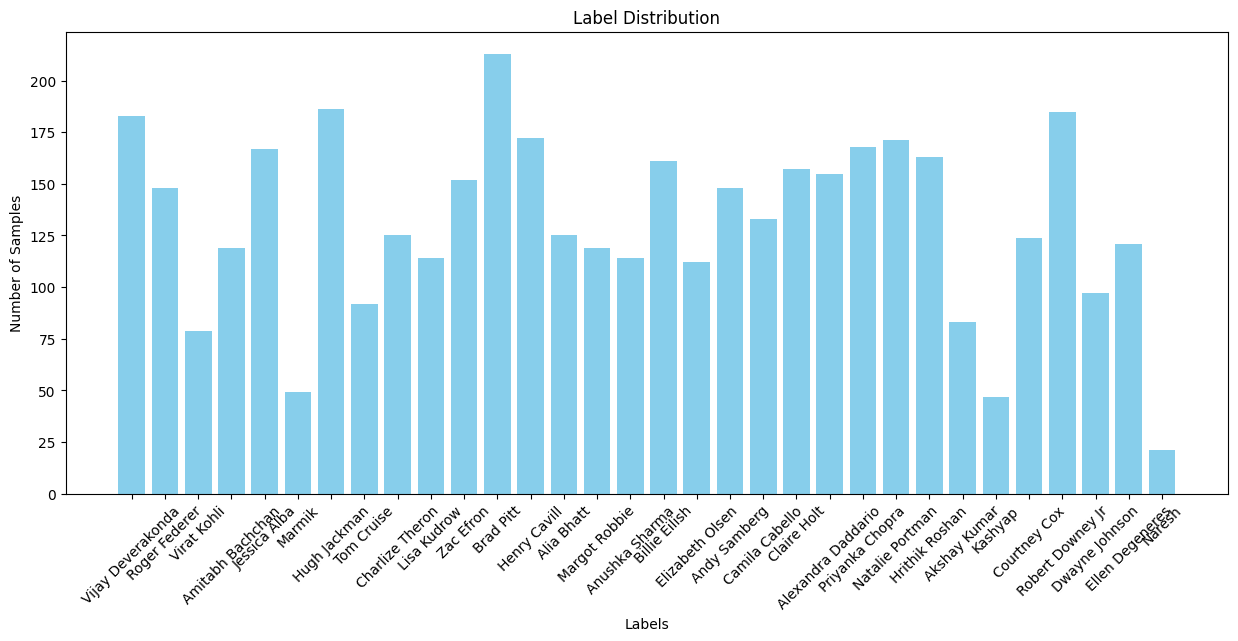

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
# Count the number of samples for each label
label_counts = Counter(y_train)
# Bar plot of label distribution
plt.figure(figsize=(15, 6))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

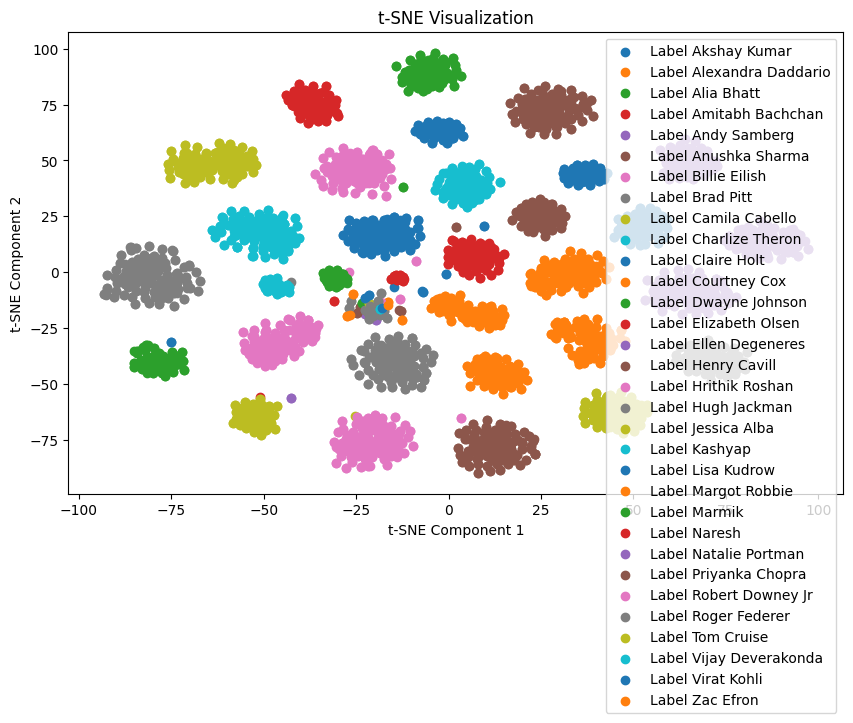

In [8]:
from sklearn.manifold import TSNE
# Perform t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)
# Scatter plot of t-SNE
plt.figure(figsize=(10, 6))
for label in np.unique(y_train):
    plt.scatter(X_tsne[y_train == label, 0], X_tsne[y_train == label, 1], label=f'Label {label}')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

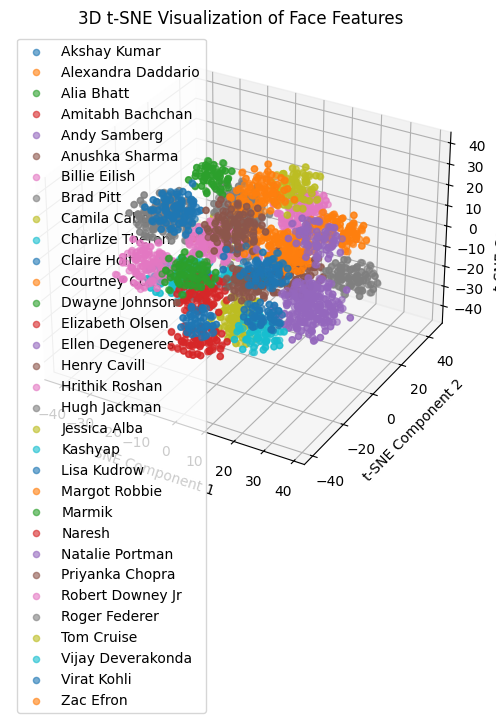

In [9]:
from mpl_toolkits.mplot3d import Axes3D

def visualize_features(features, labels, title):
    tsne = TSNE(n_components=3, perplexity=30, random_state=42)
    reduced_features = tsne.fit_transform(features)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    unique_labels = np.unique(labels)
    for label in unique_labels:
        idxs = labels == label
        ax.scatter(reduced_features[idxs, 0], reduced_features[idxs, 1], reduced_features[idxs, 2], label=label, alpha=0.6)

    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("t-SNE Component 1")
    ax.set_ylabel("t-SNE Component 2")
    ax.set_zlabel("t-SNE Component 3")
    plt.show()

visualize_features(X_train, y_train, "3D t-SNE Visualization of Face Features")

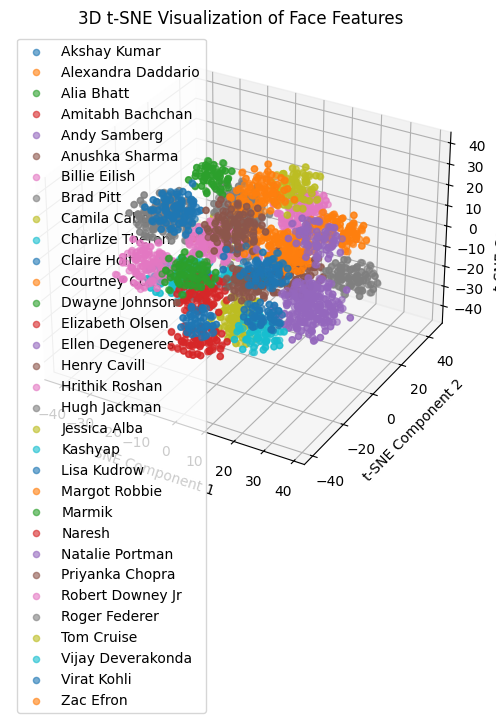

In [10]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def visualize_features(features, labels, title):
    labels = np.array(labels)  # Ensure labels are numpy array for boolean indexing

    tsne = TSNE(n_components=3, perplexity=30, random_state=42)
    reduced_features = tsne.fit_transform(features)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    unique_labels = np.unique(labels)

    for label in unique_labels:
        idxs = labels == label
        ax.scatter(
            reduced_features[idxs, 0],
            reduced_features[idxs, 1],
            reduced_features[idxs, 2],
            label=str(label),
            alpha=0.6
        )

    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("t-SNE Component 1")
    ax.set_ylabel("t-SNE Component 2")
    ax.set_zlabel("t-SNE Component 3")
    plt.show()

# Example usage
visualize_features(X_train, y_train, "3D t-SNE Visualization of Face Features")


In [11]:
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px

# Make sure your features and labels are NumPy arrays
X = np.array(X_train)  # Face embeddings or any high-dim features
y = np.array(y_train)  # Corresponding labels

# Apply t-SNE for dimensionality reduction to 3 components
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne_3d = tsne_3d.fit_transform(X)

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    x=X_tsne_3d[:, 0],
    y=X_tsne_3d[:, 1],
    z=X_tsne_3d[:, 2],
    color=y,
    labels={'x': 'Component 1', 'y': 'Component 2', 'z': 'Component 3'},
    title="t-SNE 3D Visualization of Face Embeddings",
    opacity=0.7
)

fig.update_layout(
    width=900,
    height=700,
    margin=dict(l=0, r=0, b=0, t=30),
    scene=dict(
        xaxis_title='t-SNE 1',
        yaxis_title='t-SNE 2',
        zaxis_title='t-SNE 3'
    )
)

fig.show()

print("🌀 3D t-SNE Plot Ready! Rotate and zoom to explore cluster separation 🎯")


🌀 3D t-SNE Plot Ready! Rotate and zoom to explore cluster separation 🎯


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, ConfusionMatrixDisplay
import numpy as np

# Plotting functions
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))

    plt.figure(figsize=(15, 15))  # Adjust the figure size
    disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())

    plt.xticks(rotation=90, ha='right')  # Rotate x labels to avoid overlap
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

# Binarize the labels for multiclass one-vs-rest
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Plotting functions for One-vs-Rest
def plot_roc_curve_multiclass(y_true, y_scores, model_name, num_classes):
    plt.figure(figsize=(10, 8))  # Increase figure size

    # Adjust how many classes to show at a time if too many exist
    max_classes_to_plot = 10  # Adjust based on preference
    for i in range(min(num_classes, max_classes_to_plot)):  # Plot only a subset
        fpr, tpr, _ = roc_curve(y_true[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--')  # Random guess line
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", bbox_to_anchor=(1.05, 1))  # Place legend outside
    plt.grid()
    plt.tight_layout()  # Ensure no overlap
    plt.show()

def plot_precision_recall_curve_multiclass(y_true, y_scores, model_name, num_classes):
    plt.figure(figsize=(10, 8))  # Increase figure size

    max_classes_to_plot = 10  # Adjust based on preference
    for i in range(min(num_classes, max_classes_to_plot)):  # Plot only a subset
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_scores[:, i])
        plt.plot(recall, precision, label=f'Class {i}')

    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="lower left", bbox_to_anchor=(1.05, 1))  # Place legend outside
    plt.grid()
    plt.tight_layout()  # Ensure no overlap
    plt.show()


In [13]:
# Updated evaluate_model_multiclass function
def evaluate_model_multiclass(model_name, X_test, y_test_bin, num_classes):
    with open(f'/content/drive/MyDrive/Colab Notebooks/Face Recognition/models/{model_name.lower().replace(" ", "_")}_model.pkl', 'rb') as f:
        model = pickle.load(f)

    # Predict class labels
    y_pred = model.predict(X_test)

    # Convert y_pred (strings) to numeric using np.unique to match the binarized y_test_bin
    label_encoder = {label: idx for idx, label in enumerate(np.unique(y_pred))}
    y_pred_numeric = np.array([label_encoder[label] for label in y_pred])

    # Predict probabilities for each class
    y_scores = model.predict_proba(X_test)

    # Confusion Matrix - Use argmax on y_test_bin to get the numeric labels for y_true
    plot_confusion_matrix(y_test_bin.argmax(axis=1), y_pred_numeric, model_name)

    # ROC and Precision-Recall for One-vs-Rest
    plot_roc_curve_multiclass(y_test_bin, y_scores, model_name, num_classes)
    plot_precision_recall_curve_multiclass(y_test_bin, y_scores, model_name, num_classes)


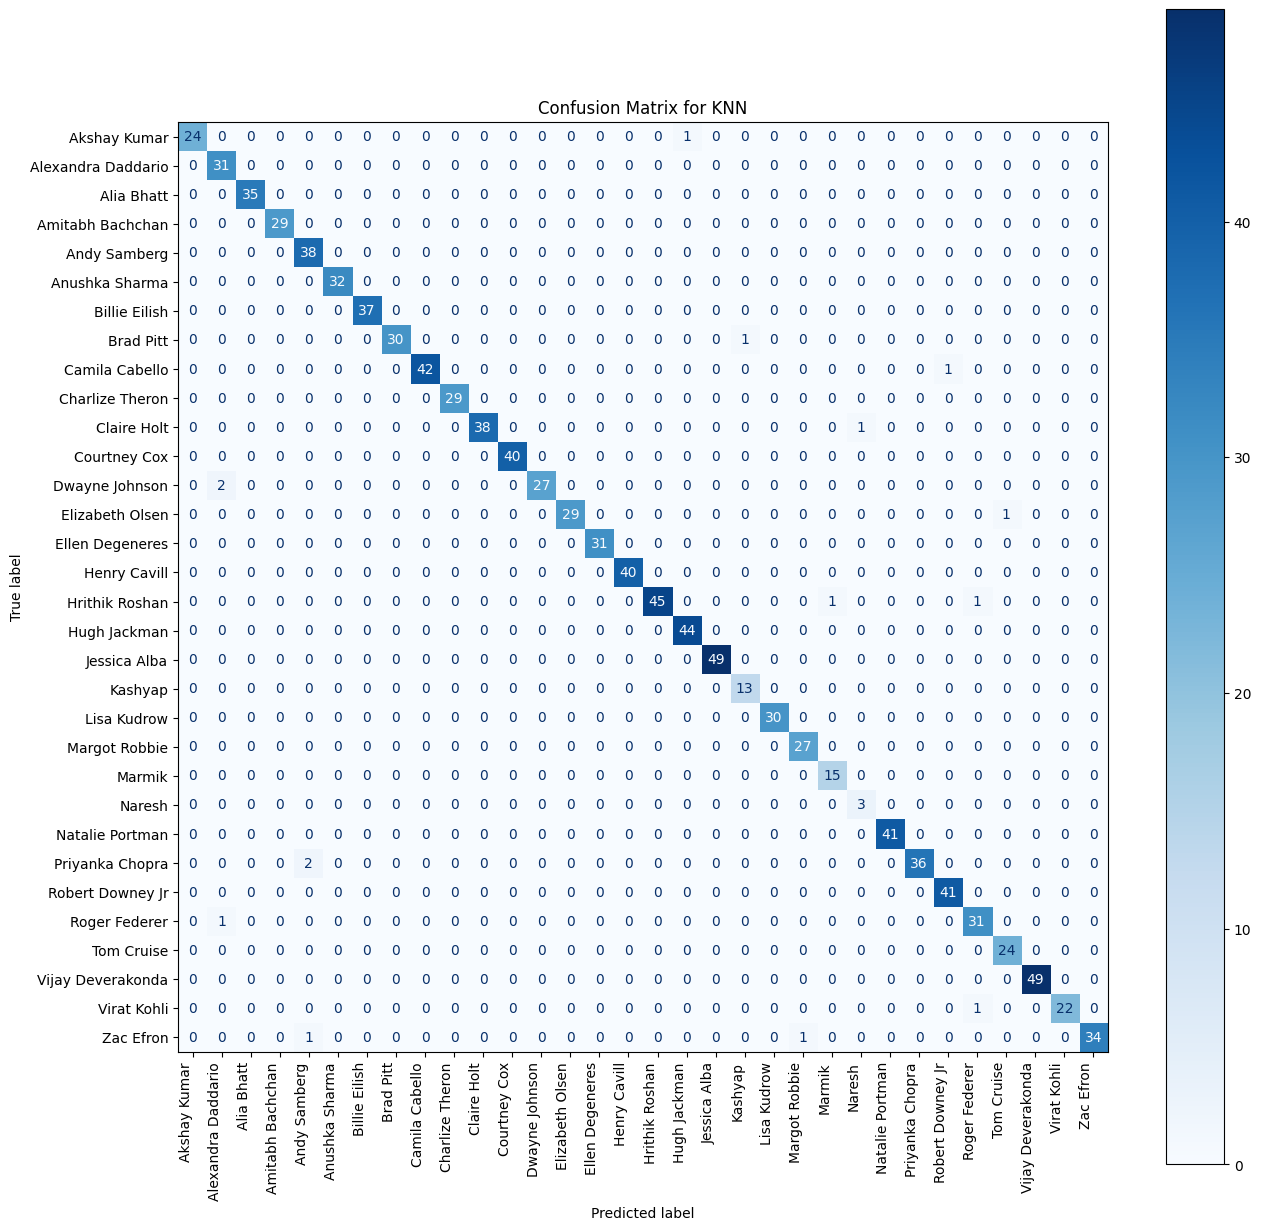

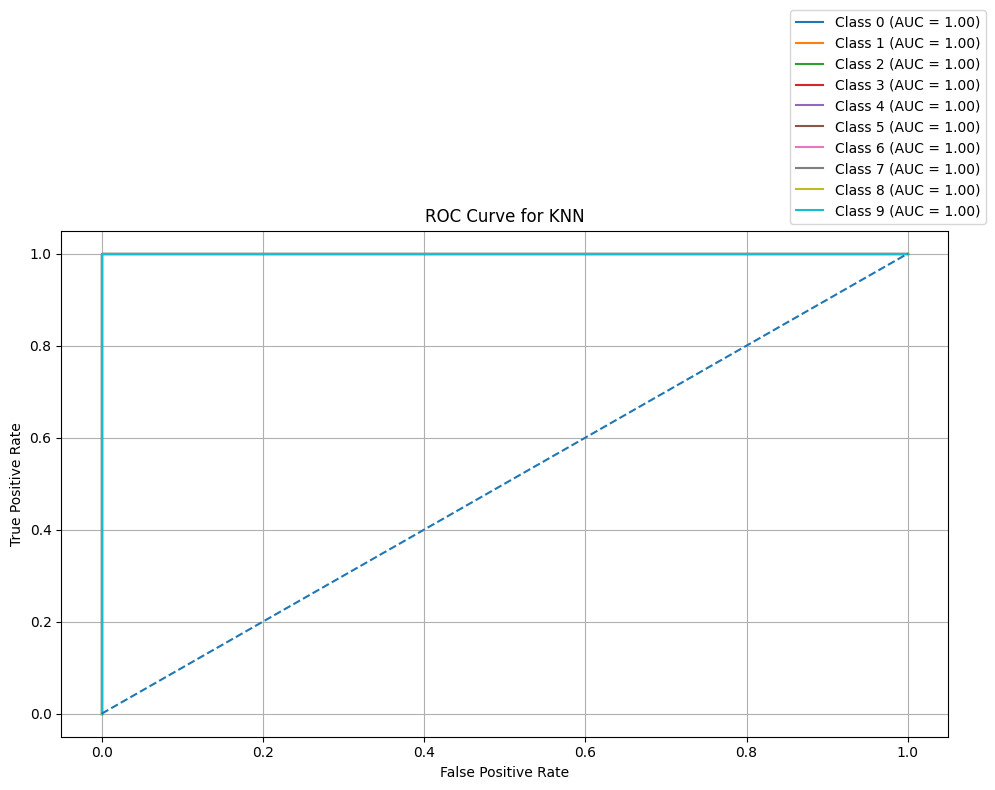

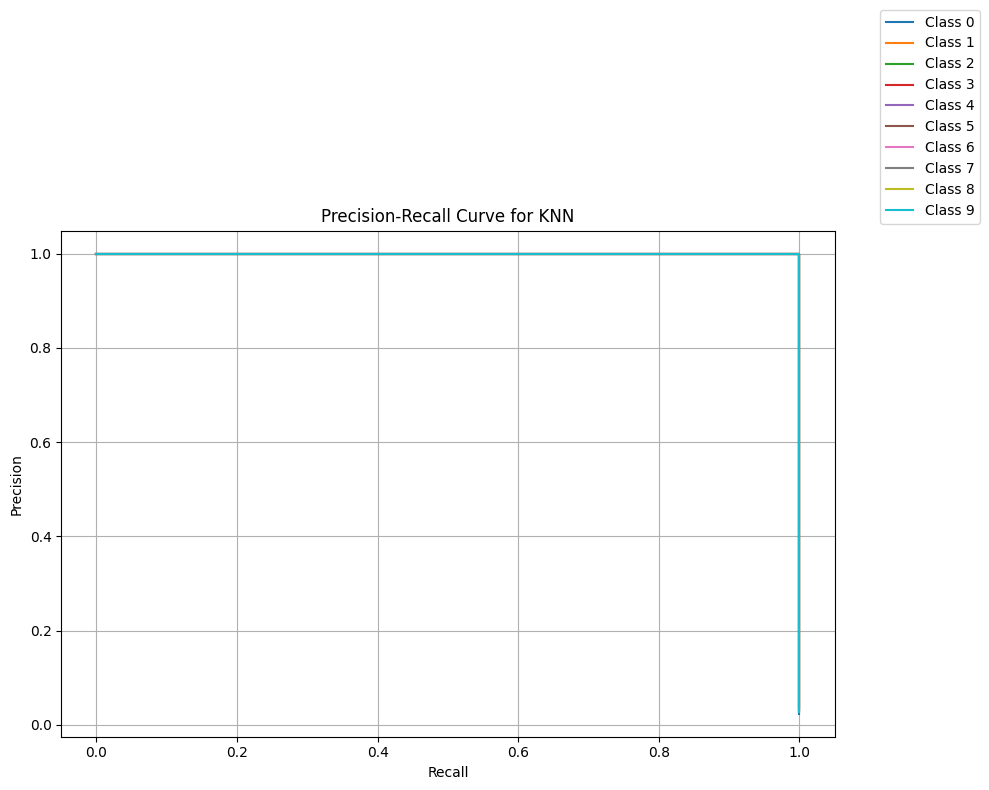

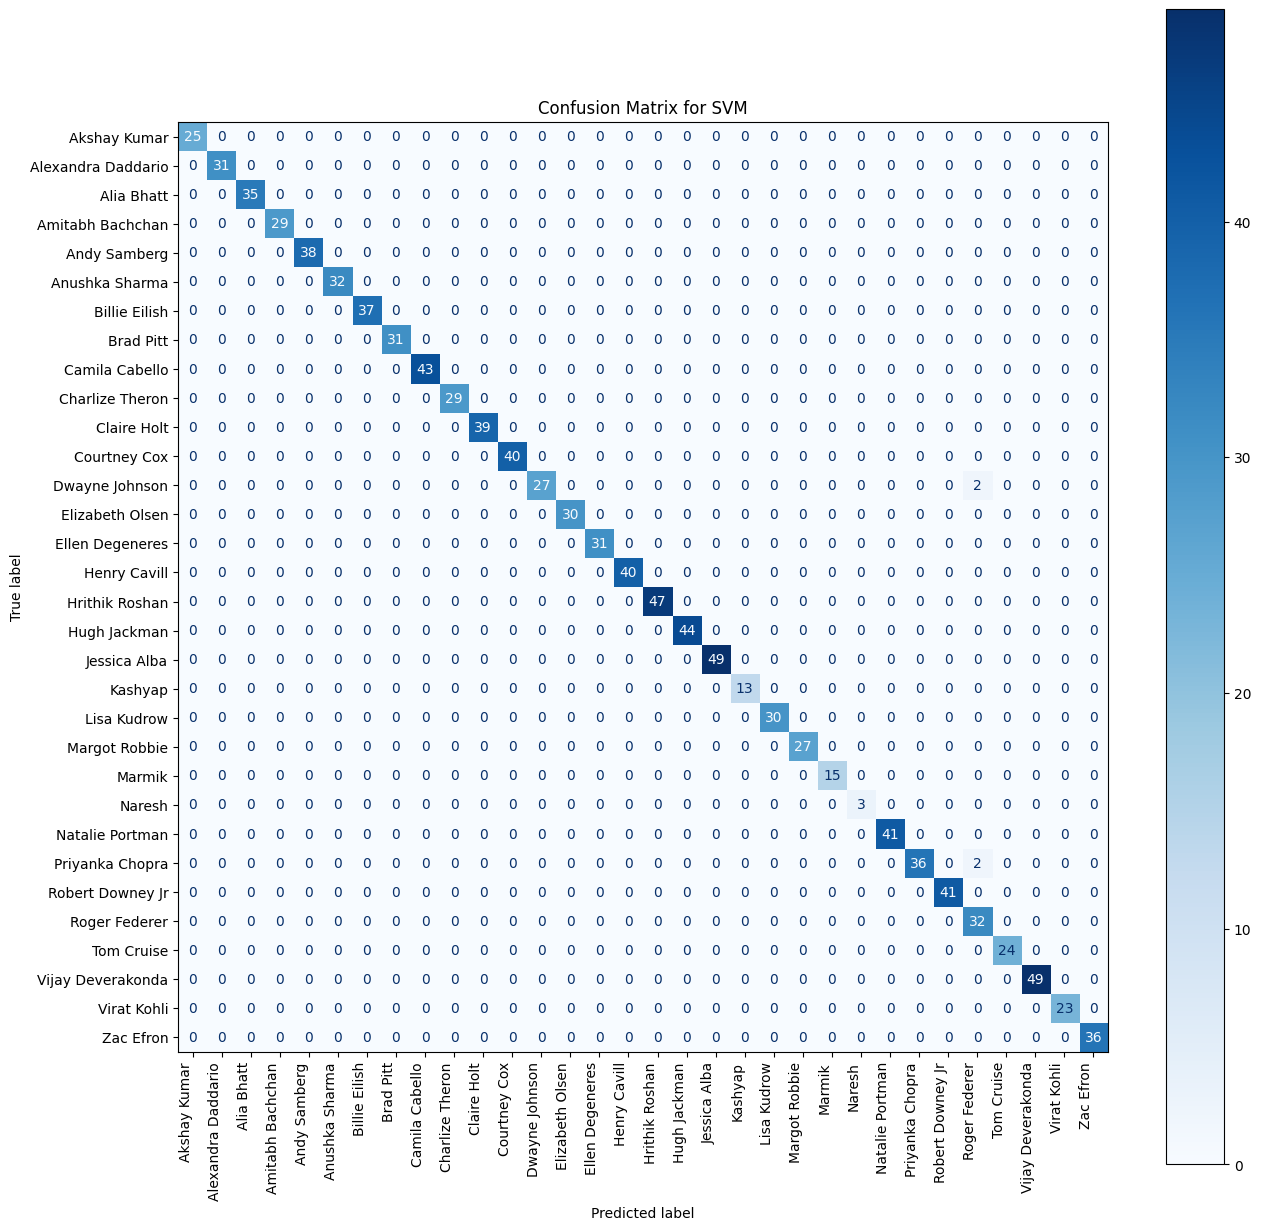

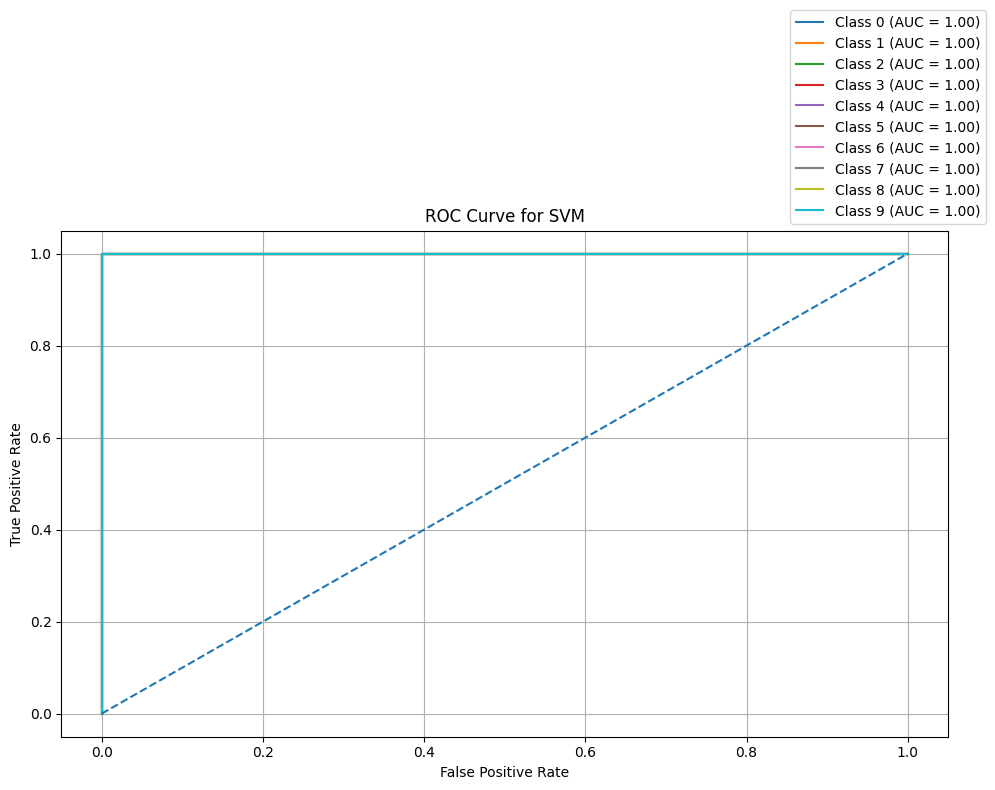

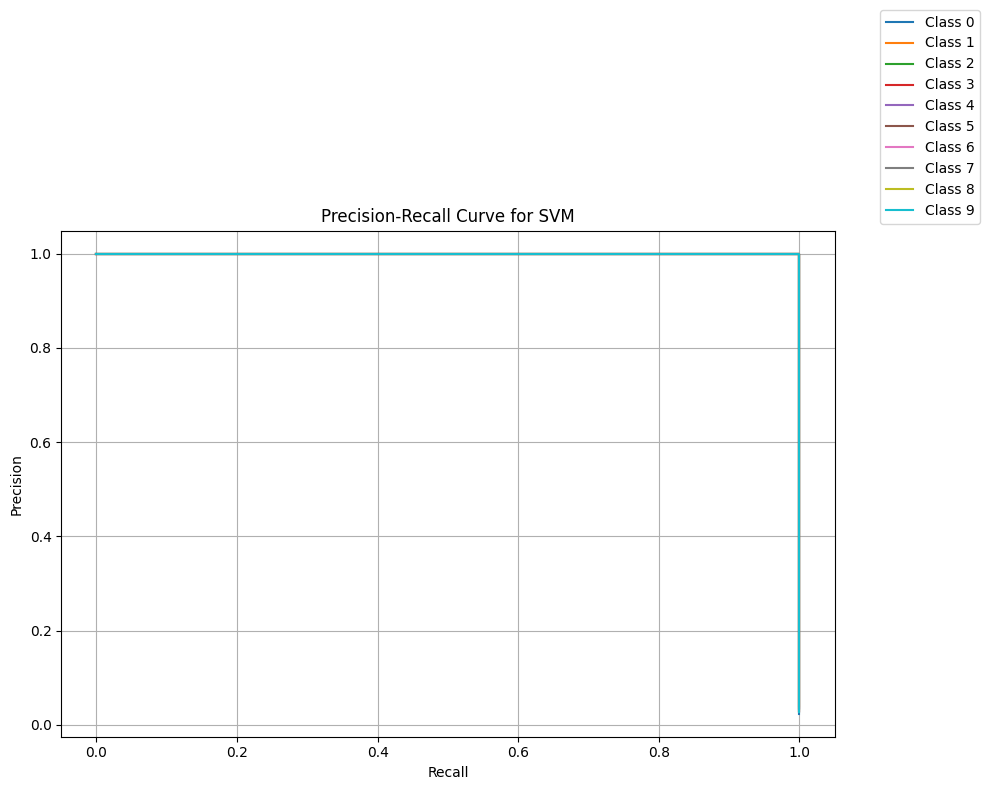

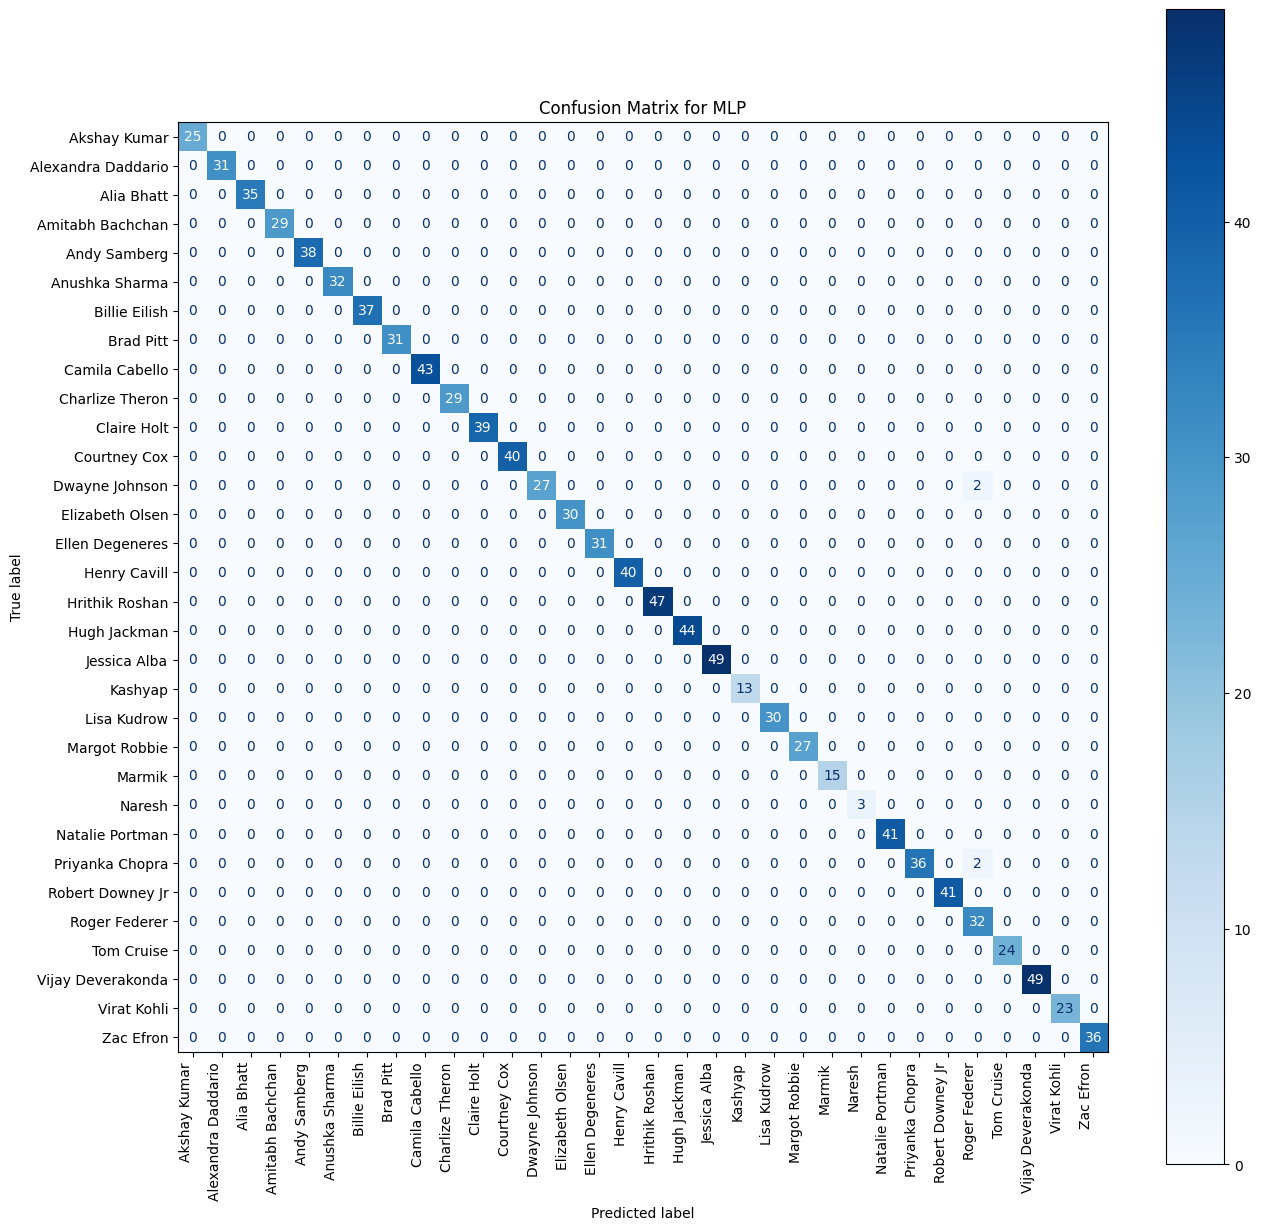

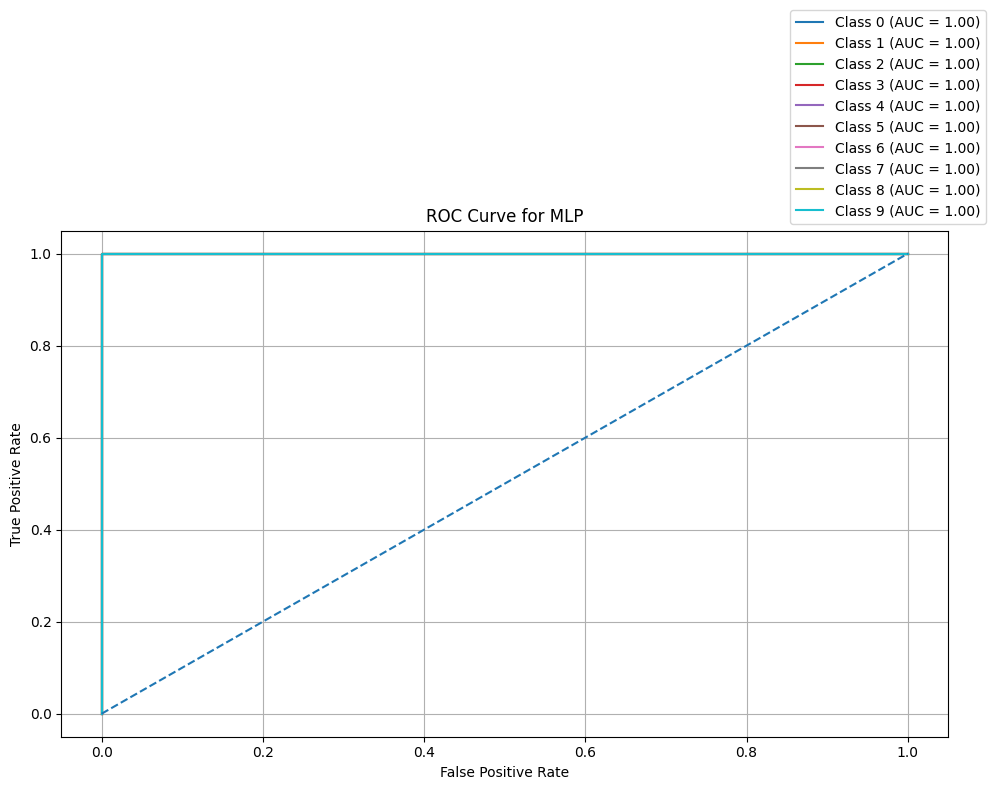

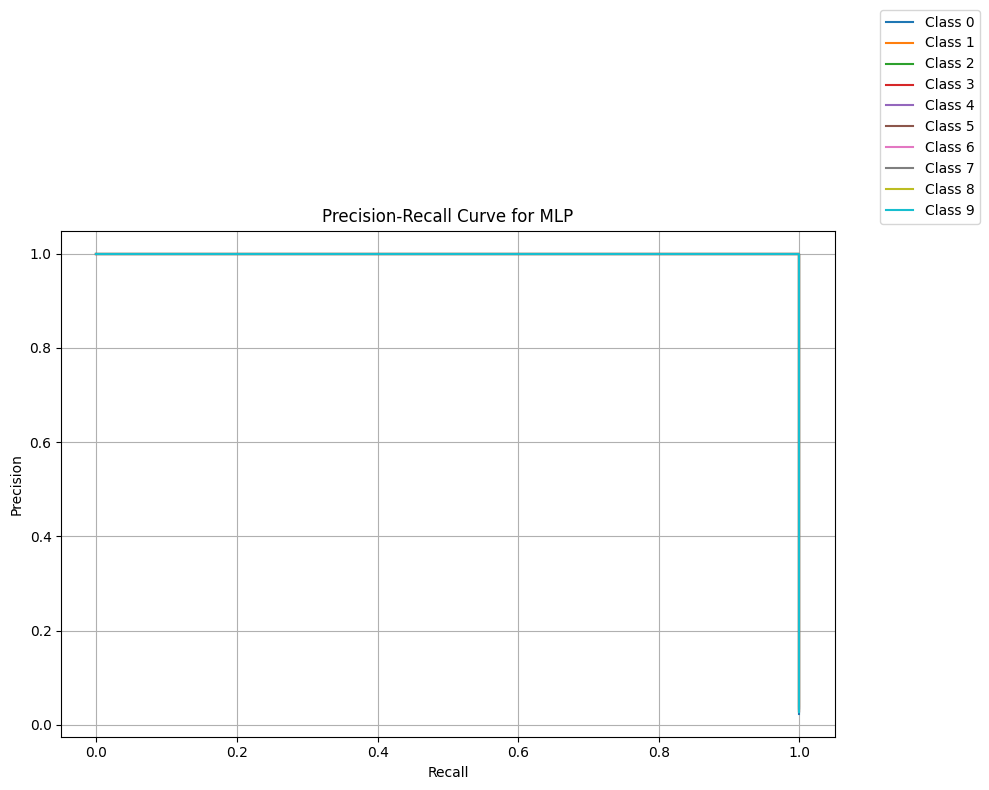

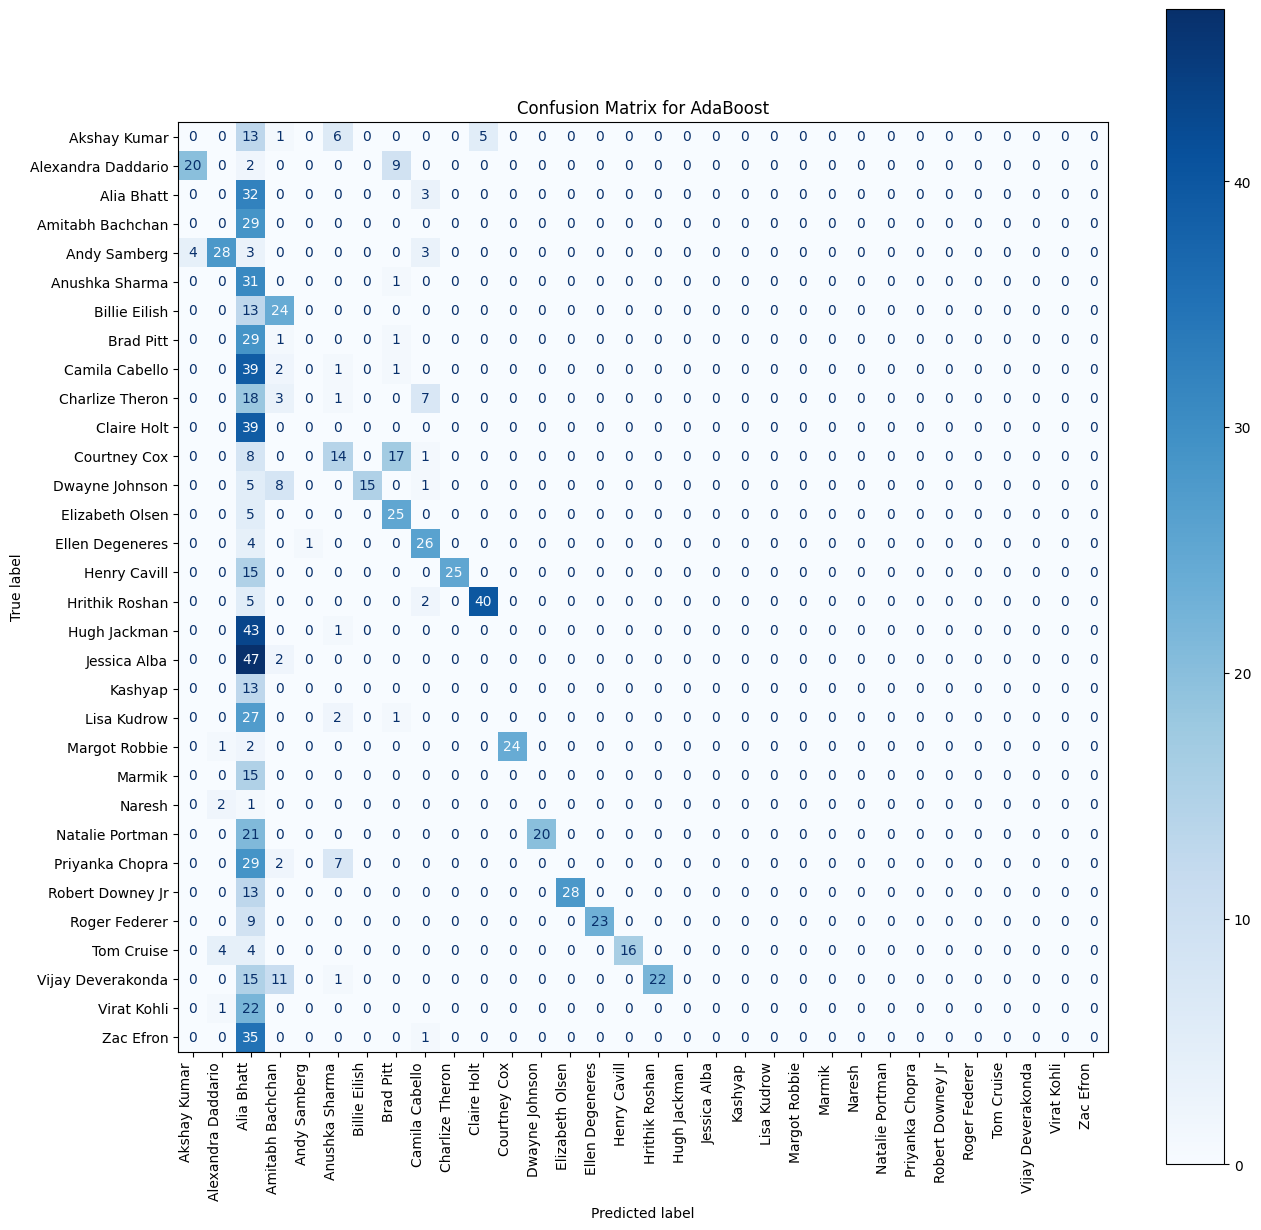

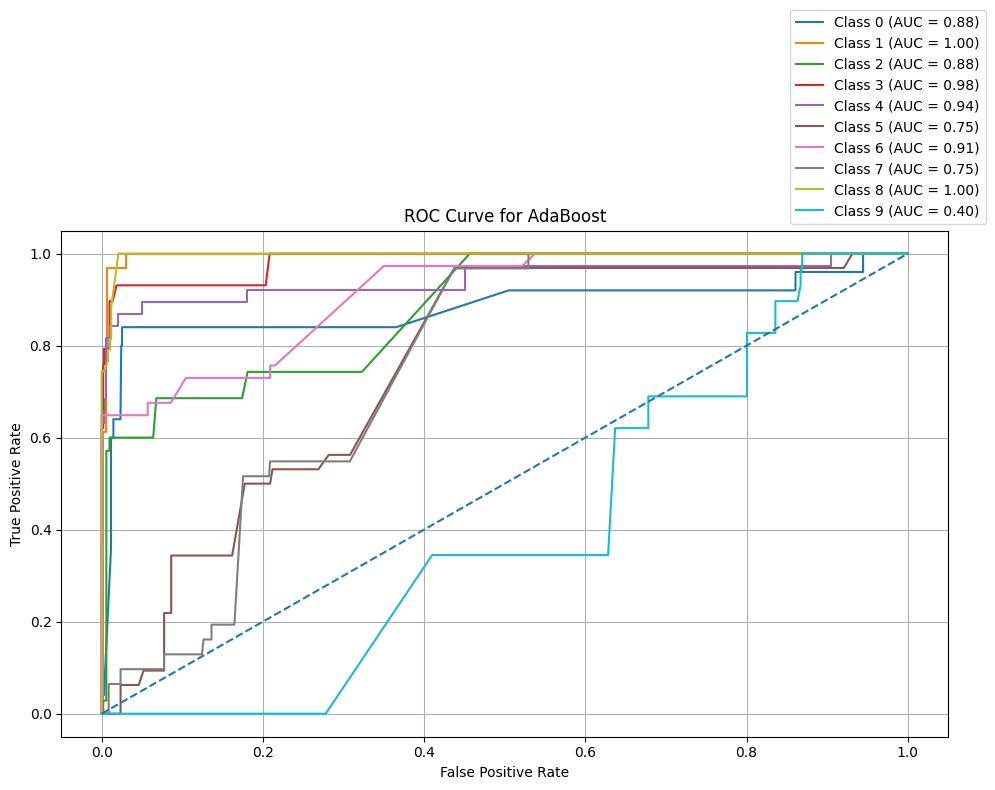

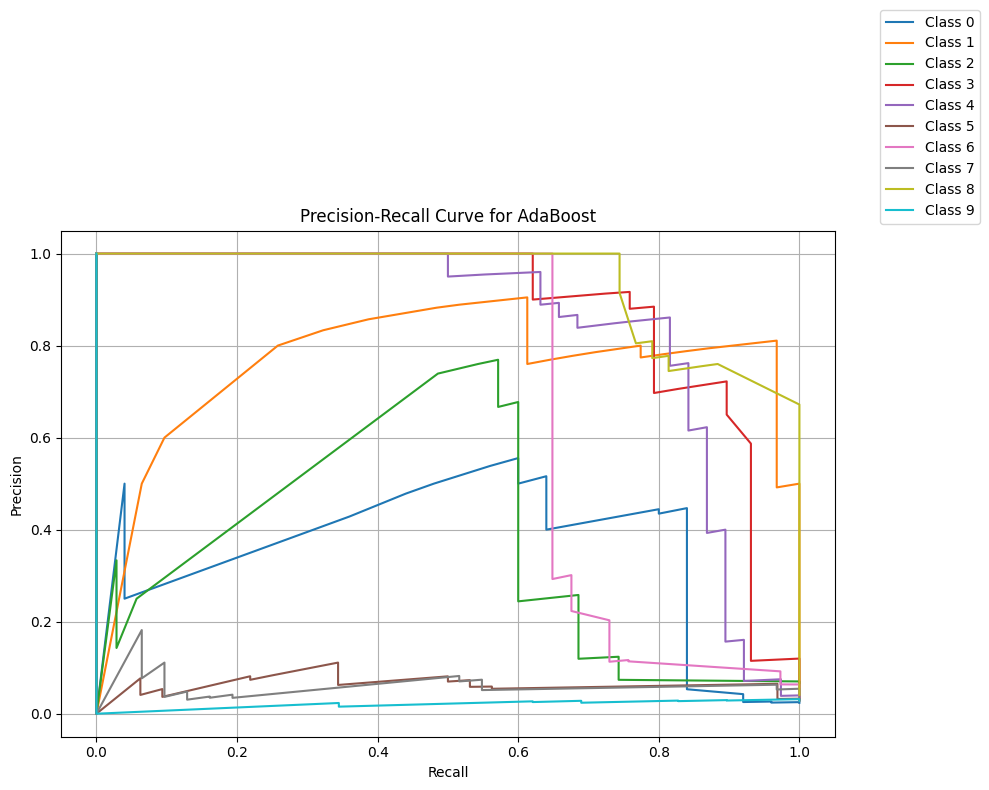

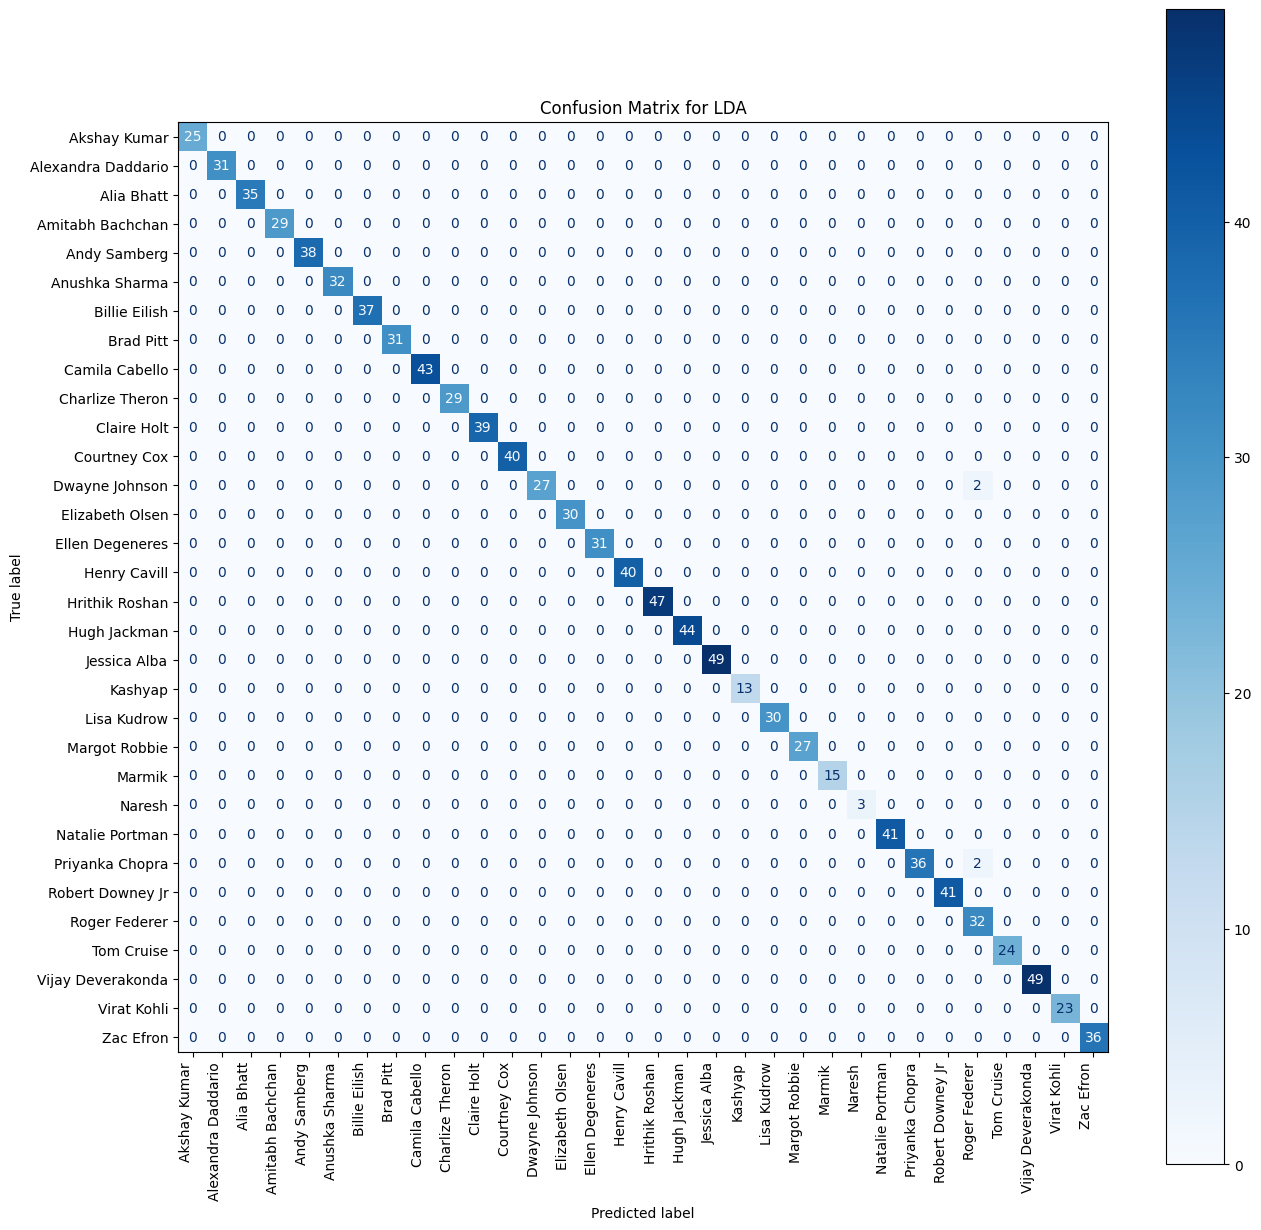

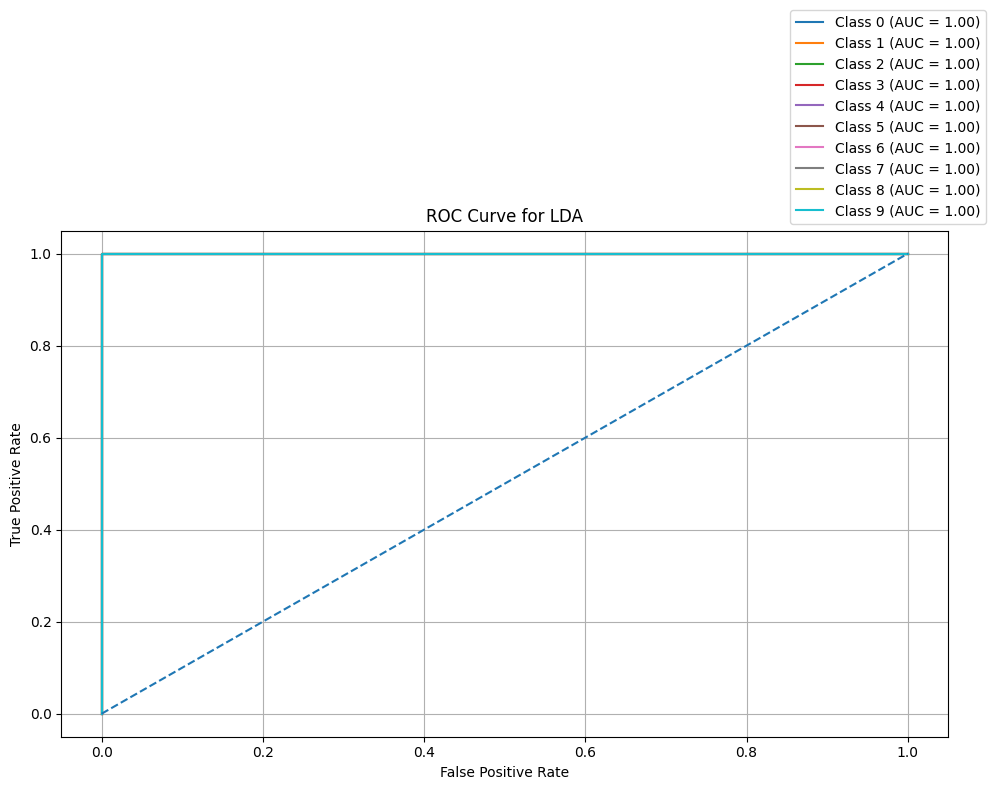

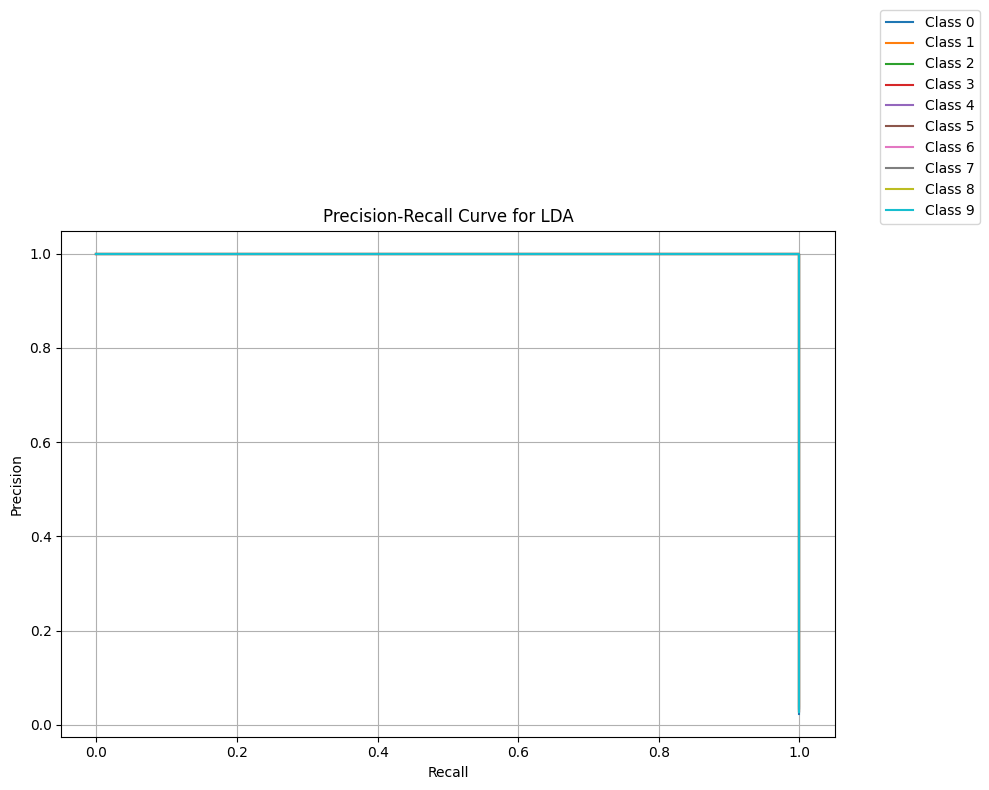

In [14]:

# Number of unique classes in your dataset
num_classes = len(np.unique(y_test))

# Evaluate each model
for model_name in models.keys():
    evaluate_model_multiclass(model_name, X_test, y_test_bin, num_classes)

In [26]:
# Load the embeddings and labels
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/face_data.pkl', 'rb') as f:
    face_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/labels.pkl', 'rb') as f:
    labels = pickle.load(f)


In [27]:
!pip install insightface onnxruntime-gpu

In [28]:
from sklearn.svm import OneClassSVM
# Train One-Class SVM model on known embeddings
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)  # nu sets the sensitivity to outliers
oc_svm.fit(face_data)

# Save the One-Class SVM model
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/ocsvm_model.pkl', 'wb') as f:
    pickle.dump(oc_svm, f)

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'fuse_conv_bias': '0', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with o

/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



Showing: Vijay_Deverakonda_at_NOTA_pressmeet_(cropped).jpg


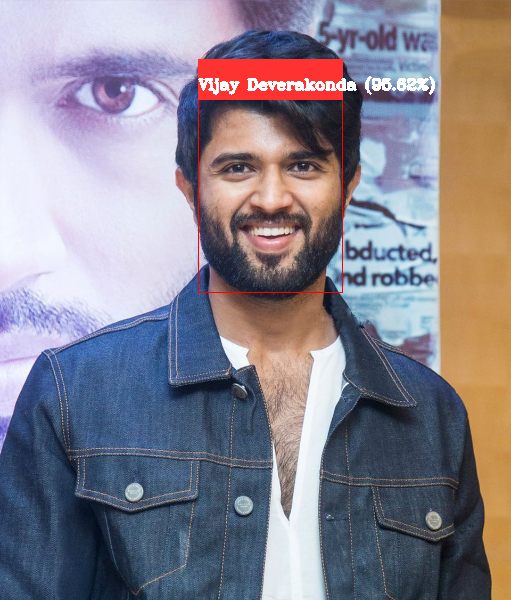

/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



Showing: robert-downey.jpg


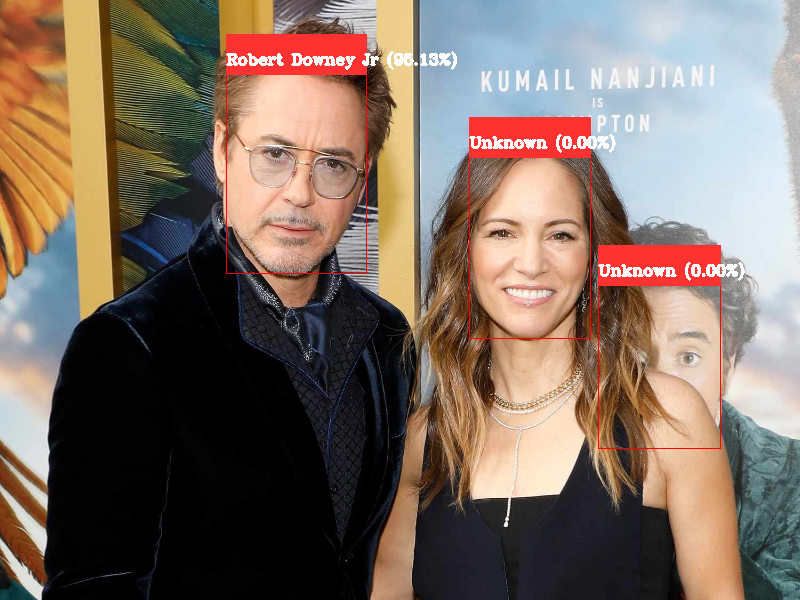

Showing: Hugh.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



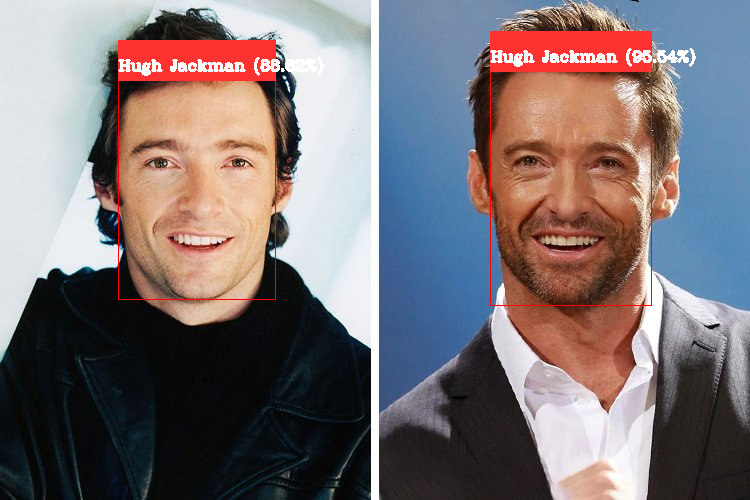

Showing: Chop_Hirthik.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



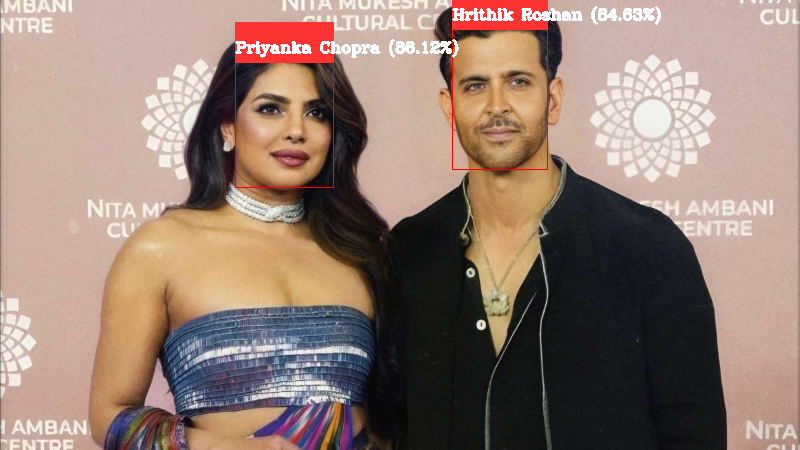

/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



Showing: Friends.jpg


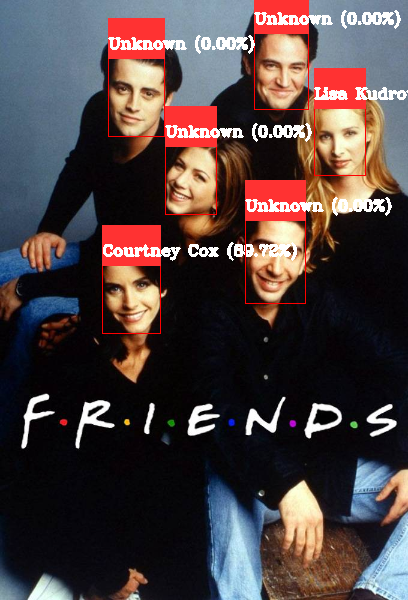

/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



Showing: anu_vira.jpg


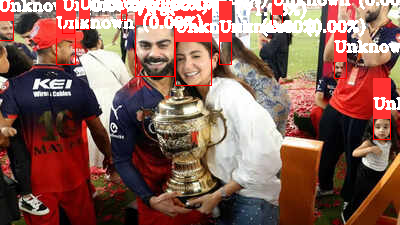

Showing: Akshay-1.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



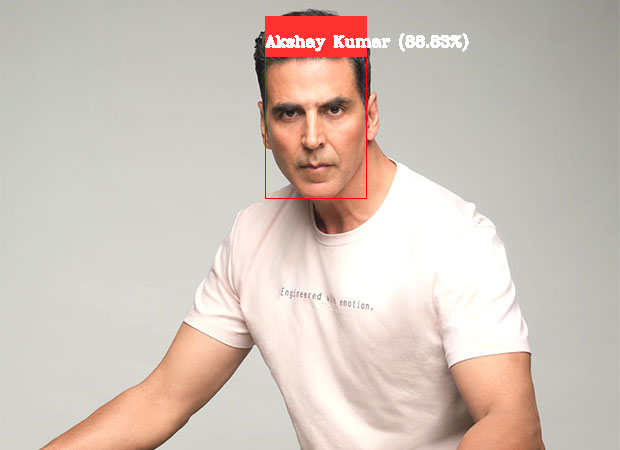

Showing: billie_cam.jpeg.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



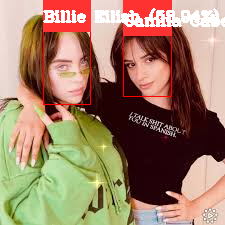

Showing: File_20250703-164252.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



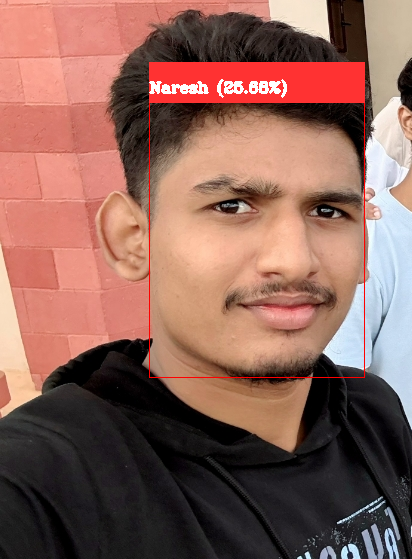

Showing: kohli.jpeg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



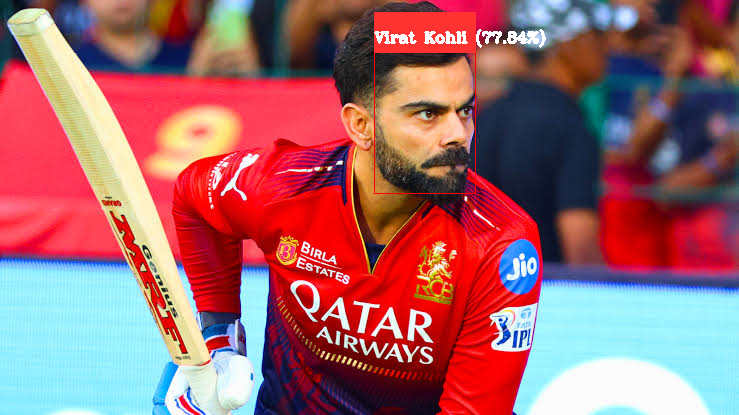

/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



Showing: Screenshot_20250703_165444_Gallery.jpg


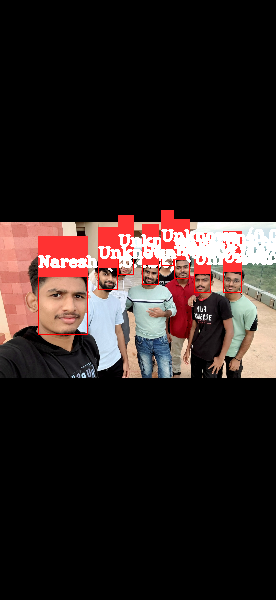

In [30]:
import cv2
import numpy as np
import os
import pickle
import insightface
import time
from insightface.app import FaceAnalysis
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.svm import OneClassSVM
from google.colab.patches import cv2_imshow  # For Colab image display

# Define the dataset directory
image_folder = '/content/drive/MyDrive/Colab Notebooks/Face Recognition/test_data'
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg'))]

# Load the embeddings and labels
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/face_data.pkl', 'rb') as f:
    face_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/labels.pkl', 'rb') as f:
    labels = pickle.load(f)

# Load the pre-trained models
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/models/svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

# Load One-Class SVM model
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/ocsvm_model.pkl', 'rb') as f:
    ocsvm_model = pickle.load(f)

# Initialize ArcFace model
def load_arcface_model():
    app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])  # Use GPU if available
    app.prepare(ctx_id=0, det_size=(640, 640))  # Prepare the face detection and embedding model
    return app

arcface_model = load_arcface_model()

# Resize function to maintain aspect ratio
def resize_with_aspect_ratio(image, max_width=800, max_height=600):
    h, w = image.shape[:2]
    scaling_factor_w = max_width / w
    scaling_factor_h = max_height / h
    scaling_factor = min(scaling_factor_w, scaling_factor_h)

    if scaling_factor >= 1:
        return image

    new_width = int(w * scaling_factor)
    new_height = int(h * scaling_factor)
    return cv2.resize(image, (new_width, new_height))

# Threshold to determine if a face is "Unknown"
UNKNOWN_DISTANCE_THRESHOLD = 1.0

# Process each image in the test folder
for img_path in image_files:
    frame = cv2.imread(img_path)
    if frame is None:
        print(f"Error: Could not read image {img_path}.")
        continue

    frame_resized = resize_with_aspect_ratio(frame)
    faces = arcface_model.get(frame_resized)

    if faces:
        for face in faces:
            bbox = face.bbox.astype(int)
            embedding = face.normed_embedding.reshape(1, -1)

            x1, y1, x2, y2 = bbox
            crop_img = frame_resized[y1:y2, x1:x2, :]

            distances = euclidean_distances(embedding, face_data)
            min_distance = distances.min()

            predicted_name = svm_model.predict(embedding)[0]
            match_prob = svm_model.predict_proba(embedding).max() * 100

            ocsvm_prediction = ocsvm_model.predict(embedding)

            if min_distance > UNKNOWN_DISTANCE_THRESHOLD:
                predicted_name = "Unknown"
                match_prob = 0.0

            # Optional OCSVM filter (uncomment if needed)
            # if ocsvm_prediction == -1:
            #     predicted_name = "Unknown"
            #     match_prob = 0.0

            # Draw the rectangle and label
            cv2.rectangle(frame_resized, (x1, y1), (x2, y2), (0, 0, 255), 1)
            cv2.rectangle(frame_resized, (x1, y1 - 40), (x2, y1), (50, 50, 255), -1)
            cv2.putText(frame_resized, f"{predicted_name} ({match_prob:.2f}%)", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255), 2)

    # Display the image in Colab
    print(f"Showing: {os.path.basename(img_path)}")
    cv2_imshow(frame_resized)
    time.sleep(2)  # Pause for 2 seconds before showing the next image


In [31]:
!pip install insightface onnxruntime-gpu

In [32]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import pickle
import insightface
from sklearn.metrics.pairwise import euclidean_distances

# Load the pre-trained models (KNN, One-Class SVM)
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/models/knn_model.pkl', 'rb') as f:
    knn_model = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/ocsvm_model.pkl', 'rb') as f:
    ocsvm_model = pickle.load(f)

# Load the embeddings and labels
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/face_data.pkl', 'rb') as f:
    face_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/Face Recognition/data/labels.pkl', 'rb') as f:
    labels = pickle.load(f)

# Initialize InsightFace model for face detection and embedding extraction
def load_arcface_model():
    app = insightface.app.FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
    app.prepare(ctx_id=0, det_size=(640, 640))  # Prepare the face detection and embedding model
    return app

arcface_model = load_arcface_model()

# Function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

# Function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    bbox_PIL.save(iobuf, format='png')
    bbox_bytes = 'data:image/png;base64,' + b64encode(iobuf.getvalue()).decode('utf-8')  # Use b64encode
    return bbox_bytes

def video_stream():
    js = Javascript('''
        var video;
        var div = null;
        var stream;
        var captureCanvas;
        var imgElement;
        var labelElement;

        var pendingResolve = null;
        var shutdown = false;

        function removeDom() {
            stream.getVideoTracks()[0].stop();
            video.remove();
            div.remove();
            video = null;
            div = null;
            stream = null;
            imgElement = null;
            captureCanvas = null;
            labelElement = null;
        }

        function onAnimationFrame() {
            if (!shutdown) {
                window.requestAnimationFrame(onAnimationFrame);
            }
            if (pendingResolve) {
                var result = "";
                if (!shutdown) {
                    captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
                    result = captureCanvas.toDataURL('image/jpeg', 0.8)
                }
                var lp = pendingResolve;
                pendingResolve = null;
                lp(result);
            }
        }

        async function createDom() {
            if (div !== null) {
                return stream;
            }

            div = document.createElement('div');
            div.style.border = '2px solid black';
            div.style.padding = '3px';
            div.style.width = '100%';
            div.style.maxWidth = '600px';
            document.body.appendChild(div);

            video = document.createElement('video');
            video.style.display = 'block';
            video.width = div.clientWidth - 6;
            video.setAttribute('playsinline', '');
            stream = await navigator.mediaDevices.getUserMedia({video: { facingMode: "environment"}});
            div.appendChild(video);

            imgElement = document.createElement('img');
            imgElement.style.position = 'absolute';
            imgElement.style.zIndex = 1;
            div.appendChild(imgElement);

            // Add a label element for displaying names and scores
            labelElement = document.createElement('div');
            labelElement.style.position = 'absolute';
            labelElement.style.color = 'white';
            labelElement.style.fontSize = '24px'; // Change the font size here
            labelElement.style.fontWeight = 'bold'; // Optional: make the text bold
            div.appendChild(labelElement);

            const instruction = document.createElement('div');
            instruction.innerHTML =
                '<span style="color: red; font-weight: bold;">' +
                'When finished, click here or on the video to stop this demo</span>';
            div.appendChild(instruction);
            instruction.onclick = () => { shutdown = true; };

            video.srcObject = stream;
            await video.play();

            captureCanvas = document.createElement('canvas');
            captureCanvas.width = 640;
            captureCanvas.height = 480;
            window.requestAnimationFrame(onAnimationFrame);

            return stream;
        }

        async function stream_frame(label, imgData) {
            if (shutdown) {
                removeDom();
                shutdown = false;
                return '';
            }

            var preCreate = Date.now();
            stream = await createDom();

            var preShow = Date.now();
            if (label != "") {
                labelElement.innerHTML = label; // Update label text
            }

            if (imgData != "") {
                var videoRect = video.getClientRects()[0];
                imgElement.style.top = videoRect.top + "px";
                imgElement.style.left = videoRect.left + "px";
                imgElement.style.width = videoRect.width + "px";
                imgElement.style.height = videoRect.height + "px";
                imgElement.src = imgData;
            }

            var preCapture = Date.now();
            var result = await new Promise(function(resolve, reject) {
                pendingResolve = resolve;
            });
            shutdown = false;

            return {'create': preShow - preCreate,
                    'show': preCapture - preShow,
                    'capture': Date.now() - preCapture,
                    'img': result};
        }
    ''')
    display(js)
def video_stream():
    js = Javascript('''
        var video;
        var div = null;
        var stream;
        var captureCanvas;
        var imgElement;
        var labelElement;

        var pendingResolve = null;
        var shutdown = false;

        function removeDom() {
            stream.getVideoTracks()[0].stop();
            video.remove();
            div.remove();
            video = null;
            div = null;
            stream = null;
            imgElement = null;
            captureCanvas = null;
            labelElement = null;
        }

        function onAnimationFrame() {
            if (!shutdown) {
                window.requestAnimationFrame(onAnimationFrame);
            }
            if (pendingResolve) {
                var result = "";
                if (!shutdown) {
                    captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
                    result = captureCanvas.toDataURL('image/jpeg', 0.8)
                }
                var lp = pendingResolve;
                pendingResolve = null;
                lp(result);
            }
        }

        async function createDom() {
            if (div !== null) {
                return stream;
            }

            div = document.createElement('div');
            div.style.border = '2px solid black';
            div.style.padding = '3px';
            div.style.width = '100%';
            div.style.maxWidth = '600px';
            document.body.appendChild(div);

            video = document.createElement('video');
            video.style.display = 'block';
            video.width = div.clientWidth - 6;
            video.setAttribute('playsinline', '');
            stream = await navigator.mediaDevices.getUserMedia({video: { facingMode: "environment"}});
            div.appendChild(video);

            imgElement = document.createElement('img');
            imgElement.style.position = 'absolute';
            imgElement.style.zIndex = 1;
            div.appendChild(imgElement);

            // Add a label element for displaying names and scores
            labelElement = document.createElement('div');
            labelElement.style.position = 'absolute';
            labelElement.style.color = 'white';
            labelElement.style.fontSize = '24px'; // Change the font size here
            labelElement.style.fontWeight = 'bold'; // Optional: make the text bold
            div.appendChild(labelElement);

            const instruction = document.createElement('div');
            instruction.innerHTML =
                '<span style="color: red; font-weight: bold;">' +
                'When finished, click here or on the video to stop this demo</span>';
            div.appendChild(instruction);
            instruction.onclick = () => { shutdown = true; };

            video.srcObject = stream;
            await video.play();

            captureCanvas = document.createElement('canvas');
            captureCanvas.width = 640;
            captureCanvas.height = 480;
            window.requestAnimationFrame(onAnimationFrame);

            return stream;
        }

        async function stream_frame(label, imgData) {
            if (shutdown) {
                removeDom();
                shutdown = false;
                return '';
            }

            var preCreate = Date.now();
            stream = await createDom();

            var preShow = Date.now();
            if (label != "") {
                labelElement.innerHTML = label; // Update label text

                // Position the label outside the boundary box
                // Adjust the following values based on the boundary box's position and size
                labelElement.style.top = '10px'; // Distance from the top of the video
                labelElement.style.left = '10px'; // Distance from the left of the video
            }

            if (imgData != "") {
                var videoRect = video.getClientRects()[0];
                imgElement.style.top = videoRect.top + "px";
                imgElement.style.left = videoRect.left + "px";
                imgElement.style.width = videoRect.width + "px";
                imgElement.style.height = videoRect.height + "px";
                imgElement.src = imgData;
            }

            var preCapture = Date.now();
            var result = await new Promise(function(resolve, reject) {
                pendingResolve = resolve;
            });
            shutdown = false;

            return {'create': preShow - preCreate,
                    'show': preCapture - preShow,
                    'capture': Date.now() - preCapture,
                    'img': result};
        }

    ''')
    display(js)
def video_stream():
    js = Javascript('''
        var video;
        var div = null;
        var stream;
        var captureCanvas;
        var imgElement;
        var labelElement;

        var pendingResolve = null;
        var shutdown = false;

        function removeDom() {
            stream.getVideoTracks()[0].stop();
            video.remove();
            div.remove();
            video = null;
            div = null;
            stream = null;
            imgElement = null;
            captureCanvas = null;
            labelElement = null;
        }

        function onAnimationFrame() {
            if (!shutdown) {
                window.requestAnimationFrame(onAnimationFrame);
            }
            if (pendingResolve) {
                var result = "";
                if (!shutdown) {
                    captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
                    result = captureCanvas.toDataURL('image/jpeg', 0.8)
                }
                var lp = pendingResolve;
                pendingResolve = null;
                lp(result);
            }
        }

        async function createDom() {
            if (div !== null) {
                return stream;
            }

            div = document.createElement('div');
            div.style.border = '2px solid black';
            div.style.padding = '3px';
            div.style.width = '100%';
            div.style.maxWidth = '600px';
            document.body.appendChild(div);

            video = document.createElement('video');
            video.style.display = 'block';
            video.width = div.clientWidth - 6;
            video.setAttribute('playsinline', '');
            stream = await navigator.mediaDevices.getUserMedia({video: { facingMode: "environment"}});
            div.appendChild(video);

            imgElement = document.createElement('img');
            imgElement.style.position = 'absolute';
            imgElement.style.zIndex = 1;
            div.appendChild(imgElement);

            // Add a label element for displaying names and scores
            labelElement = document.createElement('div');
            labelElement.style.position = 'absolute';
            labelElement.style.color = 'white';
            labelElement.style.fontSize = '24px'; // Change the font size here
            labelElement.style.fontWeight = 'bold'; // Optional: make the text bold
            div.appendChild(labelElement);

            const instruction = document.createElement('div');
            instruction.innerHTML =
                '<span style="color: red; font-weight: bold;">' +
                'When finished, click here or on the video to stop this demo</span>';
            div.appendChild(instruction);
            instruction.onclick = () => { shutdown = true; };

            video.srcObject = stream;
            await video.play();

            captureCanvas = document.createElement('canvas');
            captureCanvas.width = 640;
            captureCanvas.height = 480;
            window.requestAnimationFrame(onAnimationFrame);

            return stream;
        }

        async function stream_frame(label, imgData) {
            if (shutdown) {
                removeDom();
                shutdown = false;
                return '';
            }

            var preCreate = Date.now();
            stream = await createDom();

            var preShow = Date.now();
            if (label != "") {
                labelElement.innerHTML = label; // Update label text
            }

            if (imgData != "") {
                var videoRect = video.getClientRects()[0];
                imgElement.style.top = videoRect.top + "px";
                imgElement.style.left = videoRect.left + "px";
                imgElement.style.width = videoRect.width + "px";
                imgElement.style.height = videoRect.height + "px";
                imgElement.src = imgData;
            }

            var preCapture = Date.now();
            var result = await new Promise(function(resolve, reject) {
                pendingResolve = resolve;
            });
            shutdown = false;

            return {'create': preShow - preCreate,
                    'show': preCapture - preShow,
                    'capture': Date.now() - preCapture,
                    'img': result};
        }
    ''')
    display(js)

# Start streaming video from webcam
video_stream()

# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = eval_js('stream_frame("{}", "{}")'.format(label_html, bbox))
    if not js_reply:
        break

    # Convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # Create transparent overlay for bounding box
    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)

    # Detect faces and extract embeddings using InsightFace
    faces = arcface_model.get(img)

    if faces:
        for face in faces:
            # Get the bounding box and embedding from InsightFace
            bbox_coords = face.bbox.astype(int)  # Bounding box [x1, y1, x2, y2]
            embedding = face.normed_embedding.reshape(1, -1)  # Normalized ArcFace embedding

            x1, y1, x2, y2 = bbox_coords

            # Find the closest distance to existing embeddings
            distances = euclidean_distances(embedding, face_data)
            min_distance = distances.min()

            # Predict using KNN and get the match percentage
            predicted_name = knn_model.predict(embedding)[0]
            match_prob = knn_model.predict_proba(embedding).max() * 100  # Get the highest probability

            # Check if embedding is an outlier using One-Class SVM
            ocsvm_prediction = ocsvm_model.predict(embedding)

            if ocsvm_prediction == -1:
                predicted_name = "Unknown"
                match_prob = 0.0  # No match percentage for unknown faces

            # Draw the bounding box
            bbox_array = cv2.rectangle(bbox_array, (x1, y1), (x2, y2), (255, 0, 0), 2)
            bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255

            # Update the label with the predicted name and match probability
            label_html = f"{predicted_name} - Confidence: {match_prob:.2f}%"

    # Convert overlay of bbox into bytes and update bbox for next frame
    bbox_bytes = bbox_to_bytes(bbox_array)
    bbox = bbox_bytes

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'fuse_conv_bias': '0', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with o

<IPython.core.display.Javascript object>